In [70]:
import pandas as pd
import pandas_ta as ta
import json
from datetime import datetime

In [71]:
candles = json.loads(open("./dataset1M.json").read())
dates = [datetime.fromtimestamp(c[0]/1000) for c in candles]
df = pd.DataFrame([c[1:] for c in candles[:-1]], index=dates[:-1], columns=["open", "high", "low", "close", "volume"])

In [72]:
df["CHOP"] = df.ta.chop(14)
df["EMA7"] = df.ta.ema(7)
df["EMA25"] = df.ta.ema(25)
df["EMA50"] = df.ta.ema(50)
df["EMA100"] = df.ta.ema(100)
df["EMA150"] = df.ta.ema(150)
df["RSI"] = df.ta.rsi(14)
df["TREND"] = df.ta.ttm_trend()
df = df.dropna()

In [75]:
sig = [1 if df["EMA50"][i] < df["EMA100"][i] < df["EMA150"][i]
            and df["TREND"][i] == 1
            else 0 for i in range(len(df["close"]))]

In [84]:
buy = False
winRate = []
wallet = [100]
saveWallet = [0]
for i in range(len(sig)):
    if sum(sig[i-3:i]) == 1 and not buy:
        buy = df["close"][i]
    elif buy and df["close"][i] <= (buy + (buy * 0.01)):
        winRate.append(0)
        wallet.append(wallet[-1] + (wallet[-1] * ((df["close"][i] - buy)/buy) * 1))
        buy = False
    elif buy and df["close"][i] >= (buy - (buy * 0.01)):
        winRate.append(1)
        wallet.append(wallet[-1] + (wallet[-1] * ((df["close"][i] - buy)/buy) * 1))
        buy = False
print("{}%".format(round((sum(winRate) / len(winRate)) * 100, 2)))

51.47%


<AxesSubplot:>

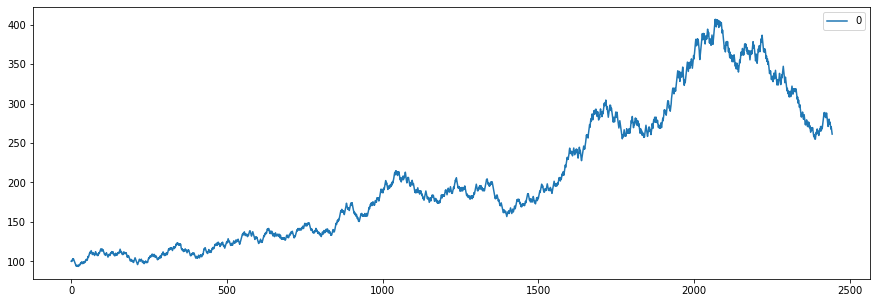

In [85]:
pd.DataFrame(wallet).plot(figsize=(15, 5))

<AxesSubplot:>

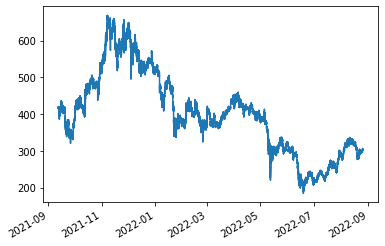

In [78]:
df["close"].plot()

0.4494696818090855
